In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [45]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [46]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [47]:
# df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [48]:
df.isnull().sum() 

Survived    0
Age         0
Fare        0
dtype: int64

In [49]:
import scipy.stats as stats  
#for ploting qq Plot

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [54]:
from sklearn.preprocessing import FunctionTransformer

In [55]:
from sklearn.compose import ColumnTransformer

In [56]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

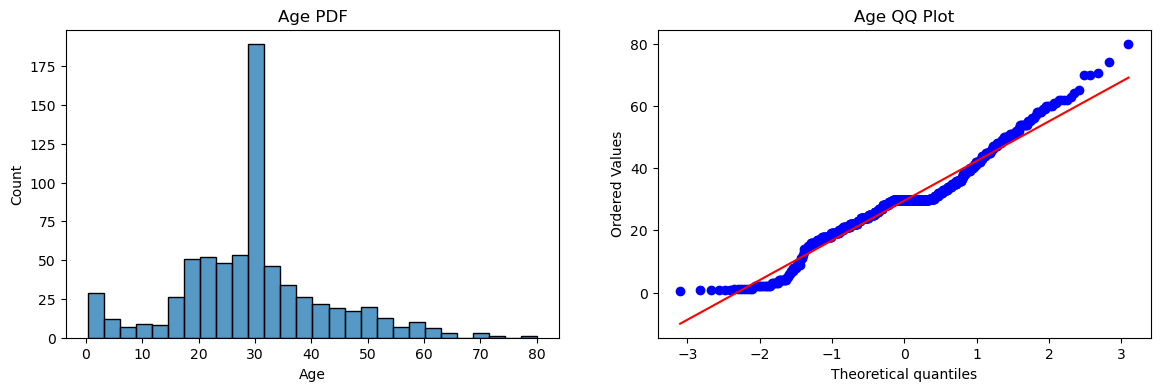

In [69]:
#age column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

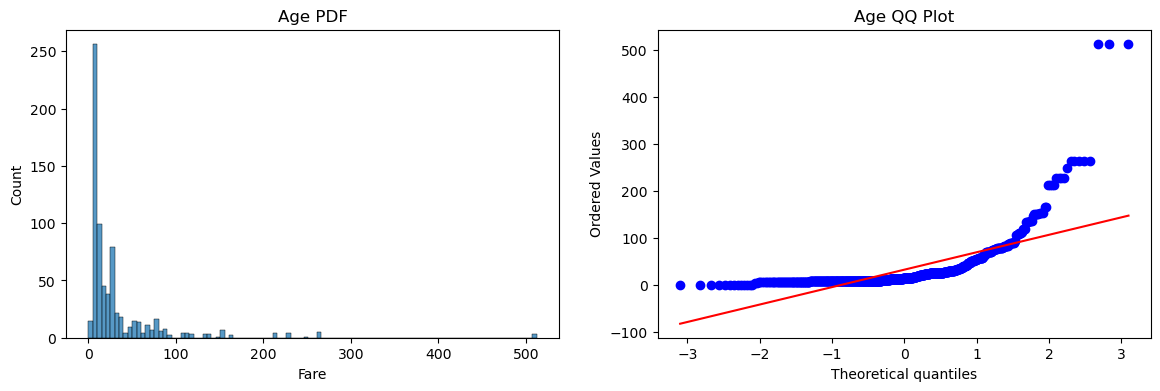

In [68]:
#fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [71]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [73]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
ypred1=clf1.predict(x_test)
ypred2=clf2.predict(x_test)

In [75]:
print("Accuracy of Logistic regression:",accuracy_score(y_test,ypred1))
print("Accuracy of Decision Tree Classifier:",accuracy_score(y_test,ypred2))

Accuracy of Logistic regression: 0.6480446927374302
Accuracy of Decision Tree Classifier: 0.6480446927374302


In [76]:
#applying log transformer on right skewd data

trf=FunctionTransformer(func=np.log1p)


In [83]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

# Assistant
This error occurs because there's a mismatch between the number of samples in your data and the number of labels you're trying to fit.

The error message indicates that you have 712 labels (in `y_train`) but only 179 samples (in `x_test_transformed`). This suggests you're trying to fit your second classifier (`clf2`) with test data features but training data labels, which is incorrect.

Would you like me to provide the corrected code?

# User
yes

In [86]:
# Assistant
# Corrected code
clf1.fit(x_train_transformed, y_train)  # This line is correct - using training data and labels

# For clf2, you should either:
# Option 1: Use training data for both features and labels
clf2.fit(x_train_transformed, y_train)  

# Option 2: If you really meant to use test data, make sure to use test labels
# clf2.fit(x_test_transformed, y_test)  # Make sure y_test exists and matches x_test_transformed in sample count

# Note: Typically, you don't train models on test data
# The standard approach is to train on training data and evaluate on test data

DecisionTreeClassifier()

In [87]:
yPred1=clf1.predict(x_test_transformed)
yPred2=clf2.predict(x_test_transformed)

In [88]:
print("Accureacy score of logistic Regression:", accuracy_score(y_test,yPred1))
print("Accureacy score of Decision Tree:", accuracy_score(y_test,yPred2))

Accureacy score of logistic Regression: 0.6815642458100558
Accureacy score of Decision Tree: 0.6871508379888268
